In [2]:
! pip install -U -q langgraph

In [6]:
from langgraph.graph import START,END,StateGraph
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image,display
from typing_extensions import TypedDict


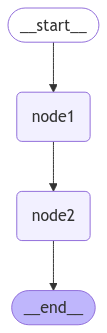

In [7]:
class OverAllState(TypedDict):
    foo:str

class PrivateState(TypedDict):
    bar:str
    

def node_1(state:OverAllState)->PrivateState:
    return {"bar":state['foo'] +1}

def node_2(state:PrivateState)->OverAllState:
    return {"foo":state['bar'] +1}


workflow:StateGraph = StateGraph(OverAllState)

workflow.add_node("node1",node_1)
workflow.add_node('node2',node_2)

workflow.add_edge(START,'node1')
workflow.add_edge('node1','node2')
workflow.add_edge('node2',END)

graph : CompiledStateGraph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [8]:
graph.invoke({'foo':3})

{'foo': 5}

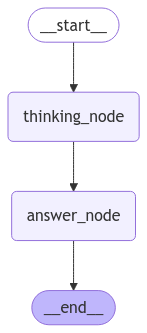

In [19]:
class InputState(TypedDict):
    question:str
class OutputState(TypedDict):
    answer:str
    
class OverallState(TypedDict):
    question:str
    answer:str
    notes:str
    
def thinking_node(state: InputState):
    return {"answer": "bye", "notes": "... his is name is Lance"}

def answer_node(state: OverallState):
    return {"answer": "bye Lance"}


workflow : StateGraph = StateGraph(OverallState,input=InputState,output=OutputState)

workflow.add_node("thinking_node",thinking_node)
workflow.add_node('answer_node',answer_node)

workflow.add_edge(START,"thinking_node")
workflow.add_edge('thinking_node','answer_node')
workflow.add_edge('answer_node',END)

builder:CompiledStateGraph = workflow.compile()

display(Image(builder.get_graph().draw_mermaid_png()))


In [20]:
builder.invoke({"question":"hi"})

{'answer': 'bye Lance'}